<a href="https://colab.research.google.com/github/Aradhyakapil/PRODIGY_ML_02/blob/main/CustomerSegmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [5]:
df.head()  # returns the first 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.dtypes  # returns the data types of the variables


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [9]:
df.shape  # returns the number of rows and columns in the dataset.


(200, 5)

In [12]:
df.describe()  # returns the descriptive statistics of the dataset.


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# Data Exploration (using 'df' now)
df.isnull().sum()  # returns the number of missing values
df.duplicated()  # Checking for duplicate values.

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


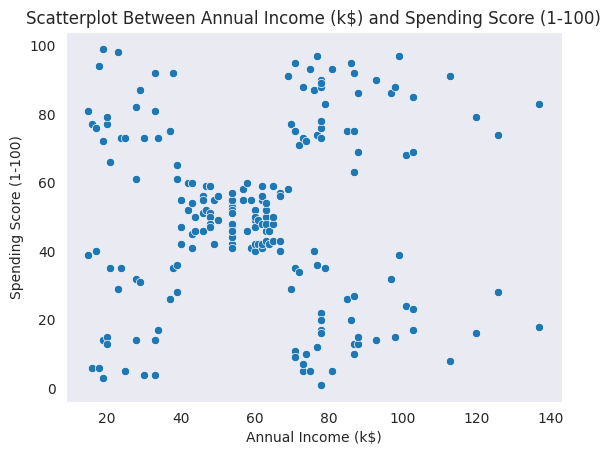

In [13]:
sns.set_style('dark')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income (k$) and Spending Score (1-100)')
plt.show()  # Add a plt.show() to display the plot

In [14]:
# Select the features for clustering
X = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

In [16]:
# Scale the features
scaler = MinMaxScaler().fit(X)
print(scaler)
#scaler.feature_range(0, 1)
scaler.transform(X)

MinMaxScaler()


array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [17]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)  # Use X (unscaled) for the elbow method
    wcss.append(kmeans.inertia_)

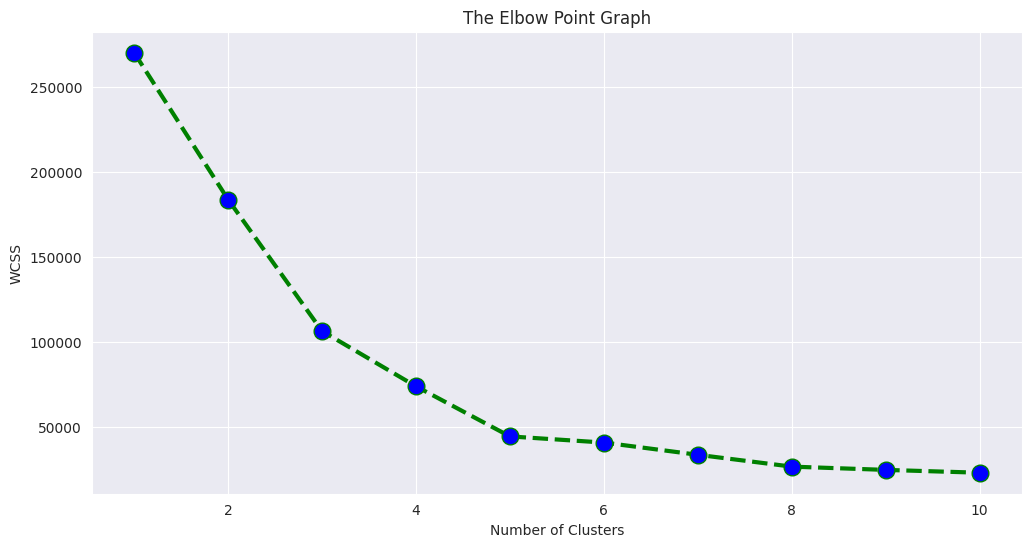

In [18]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, color='green', linestyle='dashed', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


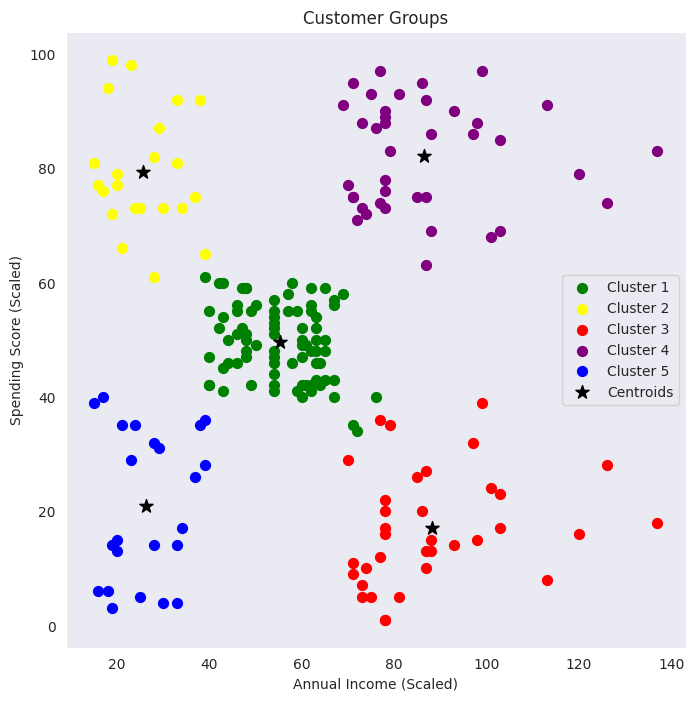

In [19]:
# Create a KMeans model with the optimal number of clusters (use the same 'kmeans' object)
kmeans = KMeans(n_clusters=5, init='k-means++')
labels = kmeans.fit_predict(X)  # Use scaled data to fit the model

# Visualize the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=50, c='red', label='Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='*', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()